<a href="https://colab.research.google.com/github/Tarane2028/ADS500B/blob/main/Assignment4_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from sklearn.datasets import make_classification
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


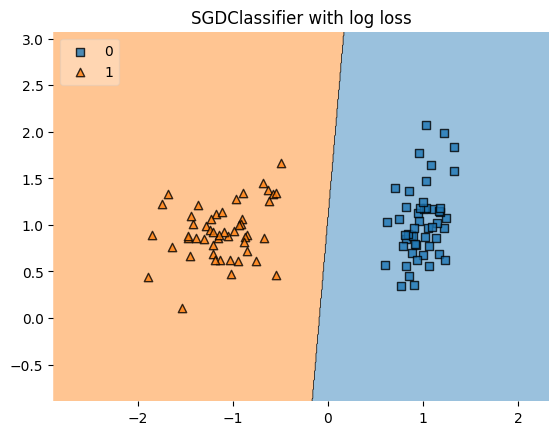

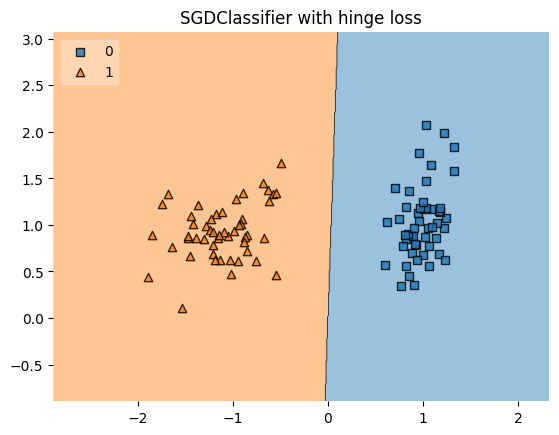

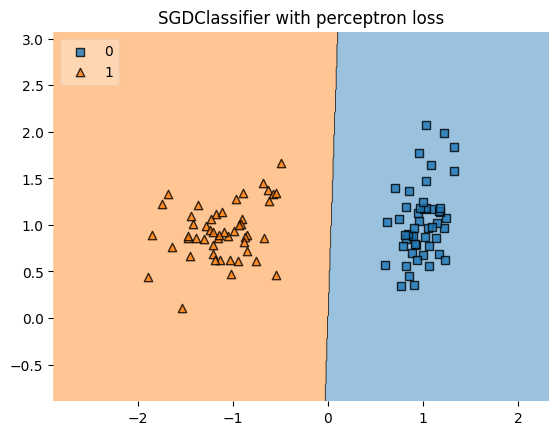

In [6]:
from sklearn.linear_model import SGDClassifier
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

loss_functions = ['log', 'hinge', 'perceptron']

for loss in loss_functions:
    model = SGDClassifier(loss=loss, random_state=1)
    model.fit(X, y)
    plot_decision_regions(X, y, clf=model, legend=2)
    plt.title(f'SGDClassifier with {loss} loss')
    plt.show()

In [15]:
X_large, y_large = make_classification(n_samples=10000, n_features=20, n_redundant=0, n_informative=20, random_state=1, n_clusters_per_class=1)

model = SGDClassifier(loss='log_loss', random_state=1)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_large, y_large, cv=5, scoring='accuracy')
print(f'Cross-validation scores: {scores}')
print(f'Average cross-validation score: {scores.mean()}')

from mlxtend.evaluate import bootstrap_point632_score
bootstrap_scores = bootstrap_point632_score(model, X_large, y_large, method='oob')
print(f'Bootstrap scores: {bootstrap_scores}')
print(f'Average bootstrap score: {bootstrap_scores.mean()}')

Cross-validation scores: [0.8975 0.9055 0.9105 0.9095 0.895 ]
Average cross-validation score: 0.9036
Bootstrap scores: [0.90852671 0.88734694 0.90447267 0.90978261 0.90319091 0.90965817
 0.9006978  0.90546448 0.91181274 0.90756303 0.90396717 0.89858233
 0.89686469 0.90827147 0.91024946 0.89530784 0.8954409  0.90702703
 0.87731734 0.89405053 0.90573214 0.9059501  0.90198208 0.90355882
 0.90700809 0.90265972 0.90127475 0.91045591 0.90426979 0.89787469
 0.90358806 0.90504451 0.88775236 0.89502165 0.8964497  0.89313594
 0.89758873 0.90200325 0.9056858  0.90946729 0.91216031 0.9130554
 0.90522876 0.89806867 0.88471996 0.89154013 0.90889546 0.89842477
 0.90662731 0.91297163 0.90295699 0.88559783 0.90189613 0.91530501
 0.90618982 0.88876742 0.9013971  0.89429576 0.89351976 0.88975741
 0.90278153 0.90911543 0.90376227 0.89830971 0.90778971 0.90975809
 0.8960195  0.90269379 0.91033726 0.90335679 0.91107518 0.88808179
 0.90192837 0.91529605 0.90102758 0.91013384 0.89331167 0.90379404
 0.90891789

<ipython-input-8-3c492e3b7a30>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bootstrap_scores, hist=True, kde=True, bins=30, color='blue', label='Bootstrap Scores')


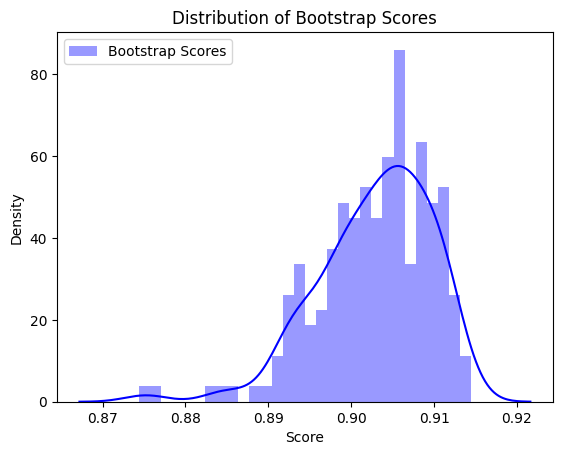

In [8]:
import seaborn as sns

sns.distplot(bootstrap_scores, hist=True, kde=True, bins=30, color='blue', label='Bootstrap Scores')
plt.title('Distribution of Bootstrap Scores')
plt.xlabel('Score')
plt.ylabel('Density')
plt.legend()
plt.show()

              l1     l2
0.0001     0.659  0.669
0.0010     0.668  0.665
0.0100     0.702  0.638
0.1000     0.895  0.641
1.0000     0.503  0.644
10.0000    0.503  0.514
100.0000   0.503  0.503
1000.0000  0.503  0.503


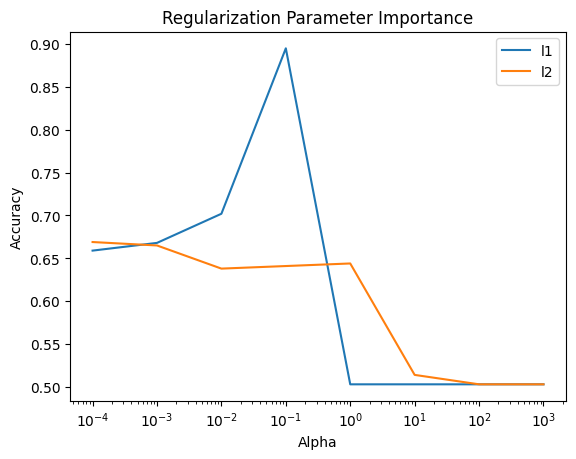

In [14]:
X_reg, y_reg = make_classification(n_samples=1000, n_features=2000, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1)

alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
results = {'l1': [], 'l2': []}

for alpha in alphas:
    for penalty in ['l1', 'l2']:
        model = SGDClassifier(loss='log_loss', penalty=penalty, alpha=alpha, random_state=1)
        score = cross_val_score(model, X_reg, y_reg, cv=5, scoring='accuracy').mean()
        results[penalty].append(score)

import pandas as pd
df = pd.DataFrame(results, index=alphas)
print(df)

df.plot(logx=True)
plt.xlabel('Alpha')
plt.ylabel('Accuracy')
plt.title('Regularization Parameter Importance')
plt.show()